<a href="https://colab.research.google.com/github/Praveenverma296/datascience/blob/main/datascience_coding_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Use double backslashes
file_path = "/new-used-cars-dataset.csv"
#/new-used-cars-dataset.csv
# Or use a raw string
# file_path = r"C:\Users\pv084\Downloads\new-used-cars-dataset(1).csv"

# Read the CSV file into a pandas DataFrame
cars = pd.read_csv(file_path)

# Print the DataFrame
print(cars)


                                 Car Names    Mileages  Ratings  \
0                  2019 Honda Accord Sport     Mileage      3.7   
1     2015 Chevrolet Corvette Stingray Z51  29,192 mi.      3.7   
2        2020 Jeep Grand Cherokee Overland  53,561 mi.      4.8   
3               2019 Audi A7 3.0T Prestige  46,664 mi.      4.9   
4             2017 Ford Mustang GT Premium  21,726 mi.      4.0   
...                                    ...         ...      ...   
9325                2019 Lexus IS 300 Base  61,106 mi.      4.7   
9326                    2019 Kia Sorento L  11,132 mi.      4.8   
9327                2017 GMC Acadia Denali  55,074 mi.      3.4   
9328                2019 Honda Pilot Elite  57,150 mi.      4.9   
9329                  2019 GMC Terrain SLT  56,293 mi.      4.8   

              Reviews   used/certified         price drop    Price  
0         (3 reviews)             Used    $501 price drop  $27,995  
1         (3 reviews)             Used    $277 price drop

In [ ]:
#subset of dataset
cars = pd.read_csv(file_path)
cars_tiny = cars.iloc[0:6, [0, 2, 3]]
print(cars_tiny)

                              Car Names  Ratings          Reviews
0               2019 Honda Accord Sport      3.7      (3 reviews)
1  2015 Chevrolet Corvette Stingray Z51      3.7      (3 reviews)
2     2020 Jeep Grand Cherokee Overland      4.8  (1,147 reviews)
3            2019 Audi A7 3.0T Prestige      4.9  (1,831 reviews)
4          2017 Ford Mustang GT Premium      4.0    (409 reviews)
5      2016 Jeep Grand Cherokee Limited      4.6  (1,348 reviews)


In [ ]:
# Replace the missing value with some constant
cars_tiny = [[1, 2, 3, 4], [5, 0, 7, 8], [9, 10, 11, 12], [13, 14, "Missing", 0]]
cars_tiny[1][1] = 0
cars_tiny[3][3] = "Missing"
cars_tiny

[[1, 2, 3, 4], [5, 0, 7, 8], [9, 10, 11, 12], [13, 14, 'Missing', 'Missing']]

In [ ]:
# Replace the missing value with the field mean or mode

import numpy as np
import pandas as pd

# Assume 'cars_tiny' is a pandas DataFrame
# Create a DataFrame with missing values
cars_tiny = pd.DataFrame({
    'Ratings': [200, None, 250, None],
    'Car Names': ['Toyota', 'Ford', 'Chevrolet', None]
})

# Display the original DataFrame
print("Original DataFrame:")
print(cars_tiny)

# Replace missing values in 'cubicinches' with the mean
mean_cubicinches = np.mean([x for x in cars_tiny['Ratings'] if not pd.isnull(x)])
cars_tiny.at[2, 'Ratings'] = mean_cubicinches

# Replace missing values in 'brand' with the mode
our_table = cars_tiny['Car Names'].value_counts()
our_mode = our_table.idxmax()
cars_tiny.at[3, 'Car Names'] = our_mode  # Note: Index 4 corresponds to position 3 in Python (0-indexed)

# Display the DataFrame after replacement
print("\nDataFrame after replacing missing values:")
print(cars_tiny)


Original DataFrame:
   Ratings  Car Names
0    200.0     Toyota
1      NaN       Ford
2    250.0  Chevrolet
3      NaN       None

DataFrame after replacing missing values:
   Ratings  Car Names
0    200.0     Toyota
1      NaN       Ford
2    225.0  Chevrolet
3      NaN     Toyota


In [ ]:
# Five Number Summary with Mean
import pandas as pd

#cars = pd.read_csv('cars.csv')
weight_summary = cars['Ratings'].describe()
weight_summary


count    9330.000000
mean        4.488682
std         0.485635
min         1.400000
25%         4.400000
50%         4.600000
75%         4.800000
max         5.000000
Name: Ratings, dtype: float64

In [ ]:
#min max normalization
mmnorm_weight = (cars['Ratings'] - min(cars['Ratings'])) / (max(cars['Ratings']) - min(cars['Ratings']))
mmnorm_weight

0       0.638889
1       0.638889
2       0.944444
3       0.972222
4       0.722222
          ...   
9325    0.916667
9326    0.944444
9327    0.555556
9328    0.972222
9329    0.944444
Name: Ratings, Length: 9330, dtype: float64

Text(0.5, 1.0, 'Histogram of Car Mileages')

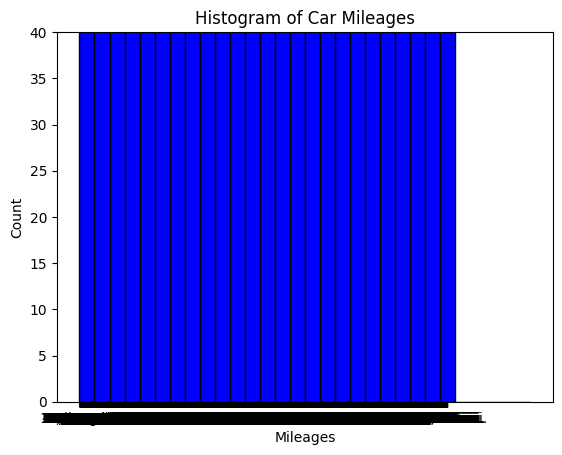

In [ ]:
# Create a histogram
import matplotlib.pyplot as plt

cars2 = pd.read_csv(file_path)

plt.hist(cars2['Mileages'], bins=30, range=(0, 5000), color='blue', edgecolor='black')
plt.ylim(0, 40)
plt.xlabel("Mileages")
plt.ylabel("Count")
plt.title("Histogram of Car Mileages")

#plt.box(on='plot', color='black')


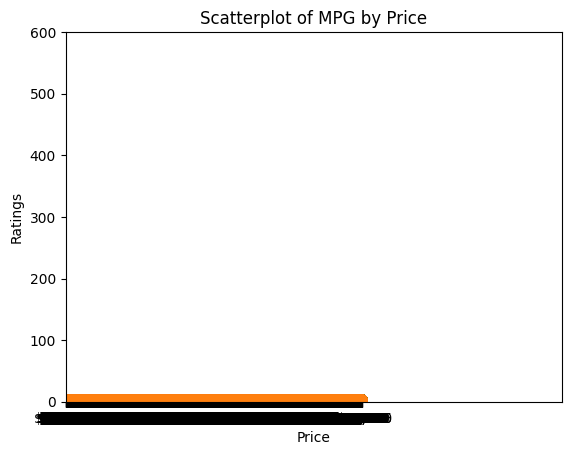

In [ ]:
# Create a scatterplot
plt.scatter(cars2['Price'], cars2['Ratings'], marker='o')
plt.scatter(cars2['Price'], cars2['Ratings'], marker='o')

plt.xlim(0, 5000)
plt.ylim(0, 600)
plt.xlabel('Price')
plt.ylabel('Ratings')
plt.title('Scatterplot of MPG by Price')

plt.show()

In [ ]:
zscore_Ratings= (cars['Ratings'] - np.mean(cars['Ratings'])) / np.std(cars['Ratings'])
zscore_Ratings

0      -1.624108
1      -1.624108
2       0.641088
3       0.847015
4      -1.006327
          ...   
9325    0.435161
9326    0.641088
9327   -2.241889
9328    0.847015
9329    0.641088
Name: Ratings, Length: 9330, dtype: float64

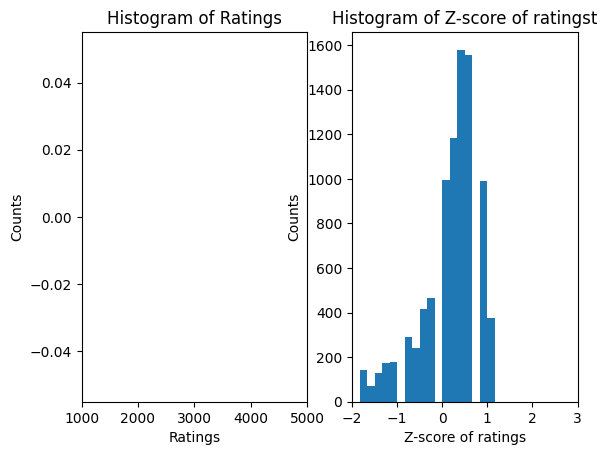

In [ ]:
# Side-by-Side Histograms of Weight and Z-score of Weight
plt.subplot(1, 2, 1)
plt.hist(cars['Ratings'], bins=30, range=(1000, 5000))
plt.xlim(1000, 5000)
plt.title("Histogram of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Counts")

plt.subplot(1, 2, 2)
plt.hist(zscore_Ratings, bins=30, range=(-2, 3))
plt.xlim(-2, 3)
plt.title("Histogram of Z-score of ratingst")
plt.xlabel("Z-score of ratings")
plt.ylabel("Counts")

plt.show()

NameError: ignored

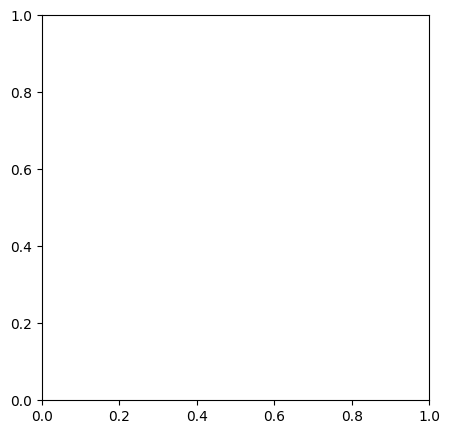

In [ ]:
plt.figure(figsize=(5, 5))
plt.subplot(1, 1, 1)
plt.plot(np.sort(invsqrt_Price), np.linspace(0.01, 0.03, len(invsqrt_Price)), 'ro')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("Normal Q-Q Plot of Inverse Square Root of Weight")
plt.grid(True)
plt.plot([np.min(invsqrt_Price), np.max(invsqrt_Price)], [np.min(invsqrt_Price), np.max(invsqrt_Price)], 'b-')
plt.show()

In [ ]:
import pandas as pd

# Sample data
data = {
    'x': [1, 1, 3, 2, 1, 4, 3, 1, 2, 3],
    'y': [9, 8, 7, 6, 5, 4, 3, 2, 1, 0],
    'z': [2, 1, 2, 3, 4, 5, 6, 7, 8, 9]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Use the default index provided by pandas
# This is usually a numeric range starting from 0
# If you don't set an index explicitly, it will be created automatically
df_with_default_index = df.copy()

# Display the DataFrame with the default index
print("\nDataFrame with Default Index:")
print(df_with_default_index)

Original DataFrame:
   x  y  z
0  1  9  2
1  1  8  1
2  3  7  2
3  2  6  3
4  1  5  4
5  4  4  5
6  3  3  6
7  1  2  7
8  2  1  8
9  3  0  9

DataFrame with Default Index:
   x  y  z
0  1  9  2
1  1  8  1
2  3  7  2
3  2  6  3
4  1  5  4
5  4  4  5
6  3  3  6
7  1  2  7
8  2  1  8
9  3  0  9


In [ ]:
## REQUIRED LIBRARIES
# For data wrangling
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None